# Deutsch-Jozsa Algorithm


In this notebook, we introduce one of the first quantum algorithm’s developed by pioneers David Deutsch and Richard Jozsa. This algorithm showcases an efficient quantum solution to a problem that cannot be solved classically but instead can be solved using a quantum device.

## References 
[1] [Michael A. Nielsen & Isaac L. Chuang Quantum Computation and Quantim Information textbook](http://mmrc.amss.cas.cn/tlb/201702/W020170224608149940643.pdf)


## Background
Let $U_f$ be an oracle (black box) that computes a Boolean function which only takes binary inputs (0’s or 1’s). These functions can be represented as $f: {0, 1}^n →  {0, 1}$. This oracle evaluates two types of functions, constant or balanced. 

A constant function takes any input and returns only 0’s or only 1’s and a balanced function takes any input and returns exactly half 0’s and half 1’s. 

**Constant:** 011010 → $U_f$ → 000000  
**Balanced:** 000011 → $U_f$ → 111000

The goal is to determine what type of function is $U_f$ based on only the outputs. If the input is as large as $2^n$ then the amount of queries a classical computer will have to make is $2n/2+1$. We can see for a large enough $n$ this problem scales exponentially and becomes inefficient to solve classically. However, leveraging a quantum algorithm we only need to query the oracle once to determine the type of function for $U_f$. This is possible because the state of its output might be in a coherent superposition of states corresponding to different answers, each which solves the problem.


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline


from braket.experimental.algorithms.deutsch_jozsa.deutsch_jozsa import (
    balanced_oracle,
    constant_oracle,
    deutsch_jozsa_circuit,
    get_deutsch_jozsa_results,
    plot_bitstrings,
)


The initalization function prepares a superposition of all possible input values and the second register is in a superposition of 0 and 1. 

In [3]:
n_qubits = 3

The constant oracle circuit is shown below:

In [14]:
constant_oracle = constant_oracle(n_qubits)
print(constant_oracle)

T  : |0|
        
q0 : -I-
        
q1 : -I-
        
q2 : -I-
        
q3 : -X-

T  : |0|


The balanced oracle circuit is shown below:

In [15]:
balanced_oracle = balanced_oracle(n_qubits)
print(balanced_oracle)

T  : |0|1|2|3|4|
                
q0 : -X-C-X-----
        |       
q1 : ---|-C-----
        | |     
q2 : -X-|-|-C-X-
        | | |   
q3 : ---X-X-X---

T  : |0|1|2|3|4|


The final circuit for solved the Deutsch-Jozsa problem is below:

In [22]:
dj_circuit = deutsch_jozsa_circuit(balanced_oracle, n_qubits)
print(dj_circuit)

T  : |0|1|2|3|4|5|6|Result Types|
                                 
q0 : -H-X-C-X-H-----Probability--
          |         |            
q1 : -H---|-C-H-----Probability--
          | |       |            
q2 : -H-X-|-|-C-X-H-Probability--
          | | |                  
q3 : -X-H-X-X-X------------------

T  : |0|1|2|3|4|5|6|Result Types|


The oracle is the Boolean function that is applied to the $n$-qubits in the query register. 

## Run on a local simulator

If the output is "000", then the algorithm predicts a constant oracle. If the output is "111", it predicts balanced.

In [27]:
from braket.devices import LocalSimulator

device = LocalSimulator()

In [28]:
task = device.run(dj_circuit, shots=10_000)

We can get an process the results with 

In [29]:
dj_probabilities = get_deutsch_jozsa_results(task)
print(dj_probabilities)

{'000': 0.0, '001': 0.0, '010': 0.0, '011': 0.0, '100': 0.0, '101': 0.0, '110': 0.0, '111': 1.0}


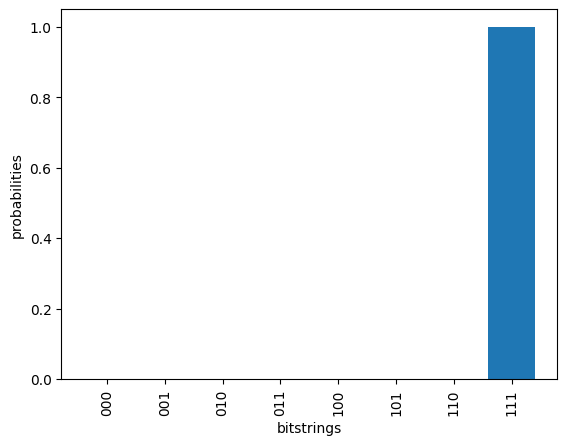

In [30]:
plot_bitstrings(dj_probabilities)

We see that the probability of "000" is zero, so the results correctly indicate that the oracle was balanced.